# Table of Contents


* **Geting Started**
* **Resampling**
* **Decorators**

Note: this notebook is meant to be a demo of some of the capabilities of **`oo-learning`** (https://github.com/shane-kercheval/oo-learning); it is not meant to show the best approach to exploring/cleaning/modeling this particular dataset. Also, with most graphs (e.g. correlations/box-plots/etc.) I will spend very little time commenting on the significance of any interesting or patterns. Again, the intent is to show a demo, not a guide to data analysis. 

# Getting Started

In this notebook, we'll see how to do 'repeated cross-validation' via **`RepeatedCrossValidationResampler`** class.

## Set Up Environment

In [1]:
# !pip install oolearning --upgrade

In [2]:
from oolearning import *
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
width = 10
plt.rcParams['figure.figsize'] = [width, width/1.333]

## Import Data

`ExploreRegressionDataset` is a convenience class described in the [first notebook of this series](https://github.com/shane-kercheval/oo-learning/blob/master/examples/regression-insurance/1-Exploring.ipynb).

In [3]:
csv_file = '../data/insurance.csv'
target_variable = 'expenses'

explore = ExploreRegressionDataset.from_csv(csv_file_path=csv_file,
                                                target_variable=target_variable)

In [4]:
explore.dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Resampling

A Resampler is an object that defines how to 'resample' a data set, for example 'repeated cross-validation', and provides information about the performance of the model fit on the resampled data.

In [5]:
# separate the features from the target variable
data_x = explore.dataset.drop(columns='expenses')
data_y = explore.dataset.expenses

# define & configure the Resampler object
resampler = RepeatedCrossValidationResampler(
    model=RidgeRegressor(),  # we'll use a Ridge model
    transformations=[DummyEncodeTransformer(CategoricalEncoding.DUMMY)],
    scores=[MaeScore(), RmseScore()],
    folds=5,  # 5 folds with 5 repeats
    repeats=5)

# resample
resampler.resample(data_x=data_x, data_y=data_y, hyper_params=RidgeRegressorHP())

We can look in the **`results`** property of the **`Resampler`** object to access various information, such as the cross validation scores, below.

There should be 1 row for each fold, multiplied by the number of repeats, so 25 rows; with each column corresponding to the Score objects that were passed in as a list to the Resampler.

In [6]:
resampler.results.resampled_scores

,MAE,RMSE
0,4327.005697,6227.300068
1,4455.138432,6224.168544
2,4417.200307,6690.971753
3,4288.534812,6243.685410
4,3636.357164,5128.786429
5,4307.420038,6213.711111
6,4229.354916,6322.625609
7,4164.646103,5831.512992
8,4006.687337,5927.005192
9,4388.480851,6234.580206


Here are the corresponding **`means`**, **`standard deviations`**, and **`coefficients of variation`** for each of the Scores, from the above results

In [7]:
resampler.results.score_means

{'MAE': 4210.926384969069, 'RMSE': 6083.661363628438}

In [8]:
resampler.results.score_standard_deviations

{'MAE': 240.82236294174788, 'RMSE': 345.4282316333786}

In [9]:
resampler.results.score_coefficients_of_variation

{'MAE': 0.06, 'RMSE': 0.06}

Or, to see this as a DataFrame:

In [10]:
resampler.results.score_stats

,MAE,RMSE
means,4210.926385,6083.661364
standard deviations,240.822363,345.428232
coefficients of variation,0.060000,0.060000


We can also visualize the Scores for each fold/repeat via boxplot:

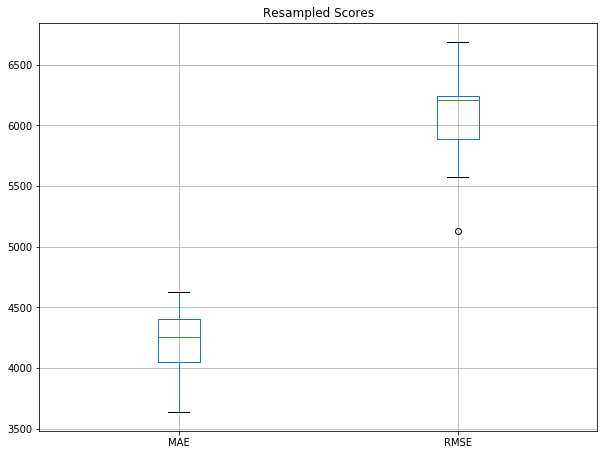

In [11]:
resampler.results.plot_resampled_scores()

# Decorators

See https://github.com/shane-kercheval/oo-learning/blob/master/examples/classification-titanic/3-Resampling.ipynb for information/usage on `Decorator` objects.